## Problem Statement
- Load data set 
- Split data into Training dataset and Testing dataset

Train Test Split
- **Why can't we do train and test the model on same data set?**
- model **overfitting** --> model remembers everything....
- How to avoid? --->  use different training and testing datasets.
- Stragegy: 
     - split data into two parts. 
     - Train the algorithm on the first part, 
     - make predictions on the second part, and 
     - evaluate the predictions against the expected results. 
- The size of the split can depend on various factors. 
- It is common to use 70% of the data for training and the remaining 30% for testing.

#### Load Python libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv("../data/pima-indians-diabetes.csv")

#### Check Your Data

In [ ]:
# check first 20 rows of the dataset
print(data.head(5))

## Train Test Split

In [ ]:
# Load Python library for Train/Test split
from sklearn.model_selection import train_test_split

In [ ]:
data_array = data.values

In [ ]:
# split data into training and testing dataset 
# Mention about the input variable and target variable (X, y)
X = data_array[:,0:8] ## input variables (features set)
y = data_array[:,8] ## Target variable (class lables)
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


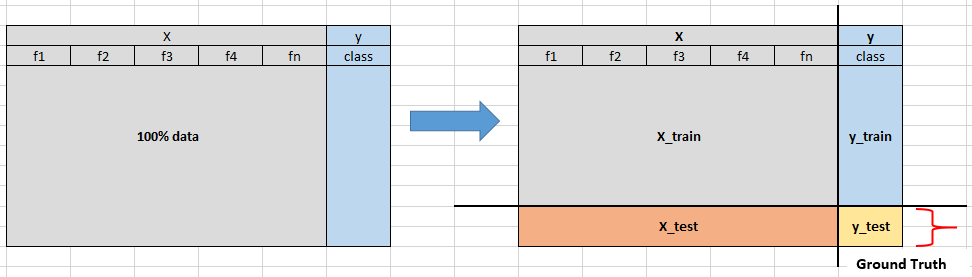

## Analyze Train Test Split

In [ ]:
# First check shape of whole data
print(data.shape)

In [ ]:
# Shape of data after train/test split

print(f'X_train.shape -> {X_train.shape}\nX_test.shape -> {X_test.shape}\ny_train.shape -> {y_train.shape}\ny_test.shape -> {y_test.shape}')

In [ ]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

## Train a classification model

In [ ]:
# Load Python library for classification model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Instantiate the model object
clf = DecisionTreeClassifier()
# Train the model with Training data
clf.fit(X_train, y_train) 
# Evaluate the model with Testing data
result = clf.score(X_test, y_test)

print(f"Accuracy - {result*100.0}")

In [ ]:
# Instantiate the model object
clf = DecisionTreeClassifier()
# Train the model with training data
clf.fit(X_train, y_train) 
# Predict class label with testing data
predictions = clf.predict(X_test)
#Evalaute the model predictions against test label
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy - {accuracy*100}")

In [ ]:
print(y_test)

In [ ]:
print(predictions)

In [ ]:
# predicted output comparison
eval_data = pd.DataFrame(y_test, columns=['ground_truth'])
eval_data['predicted_labels'] = predictions.tolist()
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(eval_data)

#### Test 2 - random_state = 35

In [ ]:
# test with random_state = 35
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=test_size, random_state=35)
print(f'X_train2.shape -> {X_train2.shape}\nX_test2.shape -> {X_test2.shape}')

In [ ]:
# Instantiate the model object
clf = DecisionTreeClassifier()
# Train the model with training data
clf.fit(X_train2, y_train2) 
# Predict class label with testing data
predictions = clf.predict(X_test2)
#Evalaute the model predictions against test label
accuracy = accuracy_score(y_test2, predictions)
print(f"Accuracy - {accuracy*100}")

#### Test 2 - random_state = 95

In [ ]:
# test with random_state = 95
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=test_size, random_state=35)
print(f'X_train3.shape -> {X_train2.shape}\nX_test3.shape -> {X_test2.shape}')

In [ ]:
# Instantiate the model object
clf = DecisionTreeClassifier()
# Train the model with training data
clf.fit(X_train3, y_train3) 
# Predict class label with testing data
predictions = clf.predict(X_test3)
#Evalaute the model predictions against test label
accuracy = accuracy_score(y_test3, predictions)
print(f"Accuracy - {accuracy*100}")

### Inference

- What is the reason of getting different accuracy?
- Each time we call **train_test_split** funciton with different values of **random_state** hyperparameter, it provides differnt set of observations for **X_train** and **X_test**. 
- One solution is to train the model with different **random_state** values
- Other solution is **scikit-learn** has automated this process using **cross validation** process